
# 5 Numpy routines and their applications




## Numpy is the fundamental package for scientific computing with Python
## Nearly every scientist working in Python draws on the power of NumPy.

## NumPy brings the computational power of languages like C and Fortran to Python, a language much easier to learn and use.
## With this power comes simplicity: a solution in NumPy is often clear and elegant.

### In this notebook I've analyzed 5 numpy functions which I felt are useful apart from the trivial numpy functions,
### They are as follow:

#### - numpy.poly1d
#### - numpy.polyder
#### - numpy.genfromtxt
#### - numpy.fromregex
#### - numpy.savetxt


In [1]:
!pip install jovian --upgrade -q

In [2]:
import jovian

<IPython.core.display.Javascript object>

Let's begin by importing Numpy and listing out the functions covered in this notebook.
Later in the notebook I've used numpy polynomial methods to implement the Gradient Descent algorithm which is extensively used in regression problems to minimize loss.

In [3]:
import numpy as np

In [4]:
# List of functions explained 
function1 = numpy.poly1d
function2 = numpy.polyder
function3 = numpy.genfromtxt
function4 = numpy.fromregex
function5 = numpy.savetxt

NameError: name 'numpy' is not defined

## Function 1 - np.poly1d 

It is a one dimensional polynomial class, used to create polynomial objects.

It takes in an array-like argument(c_or_r) and an optional boolean argument(r).
The 'c_or_r' argument is the array of coeffecients(or roots) in decreasing powers which are used to form the polynomial,
the optional boolean argument 'r' if set to True creates the polynomial with roots as 'c_or_r'


the following code creates the polynomial $3x^4 - 3x^3 - 2x^2 + 9x - 10$

In [5]:
# Example 1 - working
p1 = np.poly1d([3,-3,-2,9,-10])  
p1


poly1d([  3,  -3,  -2,   9, -10])

the following code creates the polynomial $(x-1)(x+2)(x-3)$

In [6]:
# Example 2 - working
p2 = np.poly1d([1,-2,3], True)
p2

poly1d([ 1., -2., -5.,  6.])

Numpy makes working with polynomials fast and easy, the above code illustrated the creation of polynomial objects with numpy, furthur I demonstrate some methods of np.poly1d which help perform complex computation on polynomials

## Function 2 - np.polyder

this function takes in two arguments: the polynomial object or the sequence of coefficients and the order of differentiation

In [7]:
# Example 1 - working
np.polyder([4,3,2,1], 2)

array([24,  6])

On differentiating $4x^3 + 2x^2 + 2x + 1$ twice we get $24x + 6$

In [8]:
# Example 2 - working
np.polyder(p2, 1)

poly1d([ 3., -4., -5.])

differentiating $x^3 - 2x^2 - 5x + 6$ once yields $3x^2 -4x -5$

Now that we're done with creating a polynomial and differentiating it, let's implement the Gradient descent algorithm for $nth$ degree polynomials.

## Gradient descent 
It is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Gradient descent is based on the observation that if the multi-variable function ${\displaystyle F(\mathbf {x} )}$ is defined and differentiable in a neighborhood of a point ${\displaystyle \mathbf {a} }$ , then ${\displaystyle F(\mathbf {x} )}$ decreases fastest if one goes from ${\displaystyle \mathbf {a} }$  in the direction of the negative gradient of ${\displaystyle F}$ at ${\displaystyle \mathbf {a} ,-\nabla F(\mathbf {a} )}$. It follows that, if

${\displaystyle \mathbf {a} _{n+1}=\mathbf {a} _{n}-\gamma \nabla F(\mathbf {a} _{n})}$
for ${\displaystyle \gamma \in \mathbb {R} _{+}}$ small enough, then ${\displaystyle F(\mathbf {a_{n}} )\geq F(\mathbf {a_{n+1}} )}$.

The convergence to a local or global minima depends upon $F({x})$ and the choice of $\gamma$ which is called the learning rate

In [9]:
#implementing gradient descent algorithms for polynomial functions using numpy
import numpy as np
#seq is the sequence of coefficients in descending order of power defining the polynomial and 'a' is the learning-rate
def gradient_descent(seq, a):
    #create the polynomial object
    p = np.poly1d(seq)
    xi = 0  #initial point
    prev_fval = np.inf  
    fval = p(xi)
    #iterate until the difference between the values computed in two consecutive iterations is small enough
    while abs(fval - prev_fval) > 10**(-5):
        #moving in the direction of negative gradient
        xi -= a * np.polyder(p)(xi)
        prev_fval, fval = fval, p(xi)
        print(f'x = {xi}, fval = {fval}')
    #return the point of minima (xmin, f(xmin))
    return xi, fval

In [10]:
xmin, ymin = gradient_descent([2,4,-2,-9,-90], 0.01)
print(f'The local minima occurs at: ({xmin},{ymin})')

x = 0.09, fval = -90.82315278
x = 0.18256968, fval = -91.68322707076491
x = 0.2753858361835944, fval = -92.53510649538693
x = 0.3656300238217553, fval = -93.32677985786836
x = 0.4503026378834856, fval = -94.01079942188915
x = 0.5266773294216047, fval = -94.55660664788502
x = 0.5927701812678219, fval = -94.95761171718674
x = 0.6476529696331703, fval = -95.22925805834896
x = 0.6914916947089923, fval = -95.39989456015371
x = 0.7253205350800479, fval = -95.50018828317783
x = 0.750675867669974, fval = -95.55594846783322
x = 0.7692398669969002, fval = -95.58560088424234
x = 0.7825872820625894, fval = -95.60083879344484
x = 0.7920544317742316, fval = -95.60847163015774
x = 0.7987029403526478, fval = -95.6122243628802
x = 0.8033387970579653, fval = -95.61404492781632
x = 0.8065549796589665, fval = -95.61491983114674
x = 0.808778349402365, fval = -95.61533750523296
x = 0.8103115891701547, fval = -95.61553598328011
x = 0.8113671051983656, fval = -95.61562999883984
x = 0.8120928864921251, fval = 

Above output shows how gradient descent proceeds towards the local minima starting from the initial point 

Just for verification I've plotted the graph of the polynomial below

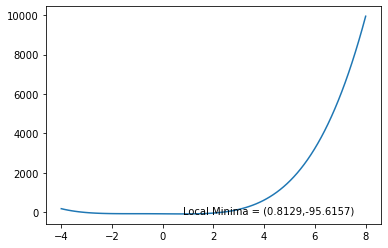

In [11]:
import matplotlib.pyplot as plt
x = np.linspace(-4,8,90)
p = np.poly1d([2,4,-2,-9,-90])
y = p(x)
plt.plot(x,y)
plt.annotate(f'Local Minima = ({xmin:.4f},{ymin:.4f})', (xmin, ymin))
plt.show()

## Function 3 - np.genfromtxt

Load data from a text file, with missing values handled as specified.

Each line past the first skip_header lines is split at the delimiter character, and characters following the comments character are discarded.

It returns a structured array

In [12]:
# Example 1 - working
from io import StringIO
s = StringIO(u"1,1.3,abcde")  #StringIO behaves as a file object
data = np.genfromtxt(s, dtype=[('myint','i8'),('myfloat','f8'),
('mystring','S5')], delimiter=",")
data

array((1, 1.3, b'abcde'),
      dtype=[('myint', '<i8'), ('myfloat', '<f8'), ('mystring', 'S5')])

the above example generates a numpy array from the supplied file object

In [13]:
# Example 2 - working
_ = s.seek(0) # needed for StringIO example only
data = np.genfromtxt(s, dtype=None,
names = ['myint','myfloat','mystring'], delimiter=",")
data

array((1, 1.3, b'abcde'),
      dtype=[('myint', '<i4'), ('myfloat', '<f8'), ('mystring', 'S5')])

when dtype is None, it itself assigns the dtypes

In [14]:
# Example 3 - breaking (to illustrate when it breaks)
f = StringIO('Al, 903\nJess, \nRic, 903')
data = np.genfromtxt(f, dtype = None, names = ['name', 'wage'] )

ValueError: Some errors were detected !
    Line #2 (got 1 columns instead of 2)

this throws an error because: When spaces are used as delimiters, or when no delimiter has been given as input, there should not be any missing data between two fields.
This can be fixed as follows:

In [15]:
#Fix
f.seek(0)
data = np.genfromtxt(f, dtype = None, names = ['name', 'wage'], delimiter = ',')
data

array([(b'Al', 903), (b'Jess',  -1), (b'Ric', 903)],
      dtype=[('name', 'S4'), ('wage', '<i4')])

## Function 4 - np.fromregex

Constructs an array from a text file using a regex expression.

In this case, the returned array is always a structured array, and is constructed from all matches of the regular expression in the file. Groups in the regular expression are converted to fields of the structured array.

In [16]:
# Example 1 - working
from io import StringIO
test_data = StringIO('abc 4235\ncds 63\nhay 500')  #StringIO behaves as a file object
regex_exp = r'(...)\s(\d+)'
arr = np.fromregex(test_data, regex_exp, dtype = [('key', 'S3'), ('value', 'i8')])

The resulting array is

In [17]:
arr

array([(b'abc', 4235), (b'cds',   63), (b'hay',  500)],
      dtype=[('key', 'S3'), ('value', '<i8')])

In [18]:
arr['key']

array([b'abc', b'cds', b'hay'], dtype='|S3')

In [19]:
arr['value']

array([4235,   63,  500], dtype=int64)

The above code snippet creates a file like object using StringIO, initializes a regex expression to capture the key and value from the file into a numpy array

In [20]:
# Example 2 - working
data2 = StringIO('Akshat Asthana, 22, akshat.asthana@airbus.com\nColin Farell, 35,colin.farell@bruges.com\nLeo Dicaprio,39, leo.oldsport@daisy.com')
regex = r'([A-Za-z]*\s[A-Za-z]*),\s?(\d{1,2}),\s?(.*@.*\.com)'
arr2 = np.fromregex(data2, regex, dtype = [('name', 'S30'), ('age', 'i8'), ('email', 'S60')])

The resulting array is:

In [21]:
arr2

array([(b'Akshat Asthana', 22, b'akshat.asthana@airbus.com'),
       (b'Colin Farell', 35, b'colin.farell@bruges.com'),
       (b'Leo Dicaprio', 39, b'leo.oldsport@daisy.com')],
      dtype=[('name', 'S30'), ('age', '<i8'), ('email', 'S60')])

In [22]:
arr2['name']

array([b'Akshat Asthana', b'Colin Farell', b'Leo Dicaprio'], dtype='|S30')

In [23]:
arr2['age']

array([22, 35, 39], dtype=int64)

In [24]:
arr2['email']

array([b'akshat.asthana@airbus.com', b'colin.farell@bruges.com',
       b'leo.oldsport@daisy.com'], dtype='|S60')

the above example reads name, age and email from a file of such records

## Function 5 - numpy.savetxt

Saves an array to a textfile, takes in the filename and array as required arguments together with other optional keyword arguments

In [25]:
# Example 1 - working
x = y = z = np.arange(0.0,5.0,1.0)
np.savetxt('test.out', x, delimiter=',')   # X is an array

In [26]:
#Example 1
np.savetxt('test.out', (x,y,z))   # x,y,z equal sized 1D arrays

In [27]:
#Example 2
np.savetxt('test.out', x, header = 'data',fmt='%1.4e')   # use exponential notation and added a header 'data'

The advantage of using these file I/O operations using numpy is the performance increase.
Now that we've learnt these basic and most frequently used file operations, let's put them to use:

I have 3 csv files: loans1.txt, loans2.txt, loans3.txt as follows:

In [28]:
with open('../loans3.txt') as file3:
    d3 = file3.read()
d3

'amount,duration,rate,down_payment\n883000,16,0.14,\n45230,48,0.07,4300\n100000,12,0.1,\n728400,120,0.12,100000\n3637400,240,0.06,\n82900,90,0.07,8900\n316000,16,0.13,\n15230,48,0.08,4300\n991360,99,0.08,\n323000,27,0.09,4720010000,36,0.08,20000\n528400,120,0.11,100000\n8633400,240,0.06,\n12900,90,0.08,8900\n'

the header of each file includes: amount, duration, rate, down_payment
we'll store these numerical values in a numpy array and then calculate the emi for each loan

In [36]:
#reading data from loans2.txt into a numpy array
dty = np.dtype([('amount', 'f8'), ('duration', 'f8'), ('rate', 'f8'), ('down_payment', 'f8')])
arr1 = np.genfromtxt('..\loans2.txt', delimiter = ',', skip_header = 1, filling_values = 0, dtype = dty)
arr1


array([( 828400., 120., 0.11, 100000.), (4633400., 240., 0.06,      0.),
       (  42900.,  90., 0.08,   8900.), ( 983000.,  16., 0.14,      0.),
       (  15230.,  48., 0.07,   4300.)],
      dtype=[('amount', '<f8'), ('duration', '<f8'), ('rate', '<f8'), ('down_payment', '<f8')])

In [37]:
import numpy as np
def loan_emi(amount, duration, rate, down_payment):
    """Calculates the equal montly installment (EMI) for a loan.
    
    Arguments:
        amount - Total amount to be spent (loan + down payment)
        duration - Duration of the loan (in months)
        rate - Rate of interest (monthly)
        down_payment (optional) - Optional intial payment (deducted from amount)
    """
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi = loan_amount / duration
    emi = np.ceil(emi)
    return emi

In [38]:
#the following are all numpy arrays
#the rates in the file are yearly
amount, duration, rate, down_payment = arr1['amount'], arr1['duration'], arr1['rate']/12, arr1['down_payment'] 

In [39]:
#calculating emi using the numpy arrays
emi_loan1 = loan_emi(amount, duration, rate, down_payment)

In [40]:
emi_loan1

array([10034., 33196.,   504., 67707.,   262.])

## Conclusion

So this notebook covered 5 numpy routines. 2 routines involving calculus and 3 routines involving I/O operations.
Followed by 1 application of each
- Gradient Descent 
- Calculated EMIs from the loan records from a file

## Reference Links
Provide links to your references and other interesting articles about Numpy arrays:
* Numpy official tutorial : https://numpy.org/doc/stable/user/quickstart.html
* Gradient Descent algorithm : https://en.wikipedia.org/wiki/Gradient_descent

In [41]:
jovian.commit(project = 'numpy-array-operations', filename='numpy-array-operations.ipynb')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akshatasthana1412/numpy-array-operations" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/akshatasthana1412/numpy-array-operations


'https://jovian.ml/akshatasthana1412/numpy-array-operations'